In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
df = pd.read_csv("kc_housing_data_cleaned.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,10,13,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,12,9,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,2,18,2015


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969,15.687457,2014.322962
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061,8.634890,0.467619
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000,8.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000,16.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000,23.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,31.000000,2015.000000


In [4]:
import pandas as pd
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
id,1,-0.017,0.0012,0.0052,-0.012,-0.13,0.019,-0.0036,0.012,-0.024,0.0082,-0.011,-0.0044,0.022,0.02,-0.0082,-0.0018,0.021,-0.0027,-0.14,-0.012,0.0021,0.0099
price,-0.017,1,0.31,0.53,0.7,0.09,0.26,0.26,0.39,0.036,0.67,0.61,0.32,0.054,0.098,-0.053,0.31,0.022,0.59,0.083,-0.0099,-0.015,0.0037
bedrooms,0.0012,0.31,1,0.51,0.58,0.032,0.18,-0.0021,0.078,0.026,0.36,0.48,0.3,0.16,0.16,-0.15,-0.01,0.13,0.39,0.031,-0.001,-0.0077,-0.0099
bathrooms,0.0052,0.53,0.51,1,0.76,0.088,0.5,0.064,0.19,-0.13,0.67,0.69,0.28,0.51,0.53,-0.2,0.024,0.22,0.57,0.088,0.0075,-0.0052,-0.027
sqft_living,-0.012,0.7,0.58,0.76,1,0.17,0.35,0.1,0.28,-0.059,0.76,0.88,0.43,0.32,0.34,-0.2,0.052,0.24,0.76,0.18,0.012,-0.0074,-0.029
sqft_lot,-0.13,0.09,0.032,0.088,0.17,1,-0.0048,0.021,0.075,-0.0088,0.11,0.18,0.015,0.053,0.052,-0.13,-0.086,0.23,0.14,0.72,-0.0026,0.00025,0.0056
floors,0.019,0.26,0.18,0.5,0.35,-0.0048,1,0.021,0.028,-0.26,0.46,0.52,-0.24,0.49,0.5,-0.06,0.049,0.13,0.28,-0.011,0.014,-0.0065,-0.022
waterfront,-0.0036,0.26,-0.0021,0.064,0.1,0.021,0.021,1,0.38,0.017,0.083,0.072,0.083,-0.024,-0.0069,0.029,-0.012,-0.038,0.084,0.031,0.0082,0.014,-0.005
view,0.012,0.39,0.078,0.19,0.28,0.075,0.028,0.38,1,0.046,0.25,0.17,0.27,-0.054,-0.027,0.085,0.0063,-0.078,0.28,0.073,-0.0052,0.011,0.0012
condition,-0.024,0.036,0.026,-0.13,-0.059,-0.0088,-0.26,0.017,0.046,1,-0.15,-0.16,0.17,-0.36,-0.39,0.0029,-0.015,-0.11,-0.093,-0.0031,0.022,-0.0046,-0.046


# 'View' Variable Analysis

In [5]:
df.groupby(['view']).mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
view,,,,,,,,,,,,,,,,,,,,,
0.0,4.569482e+09,4.972107e+05,3.349038,2.071298,1999.175725,14169.354324,1.491198,0.000051,3.399795,7.567052,...,1971.616936,1973.318604,98076.342212,47.559659,-122.209925,1925.292635,12175.674673,6.581422,15.662972,2014.322299
1.0,4.617411e+09,8.133733e+05,3.536364,2.350000,2571.045455,12370.596970,1.392424,0.003030,3.512121,8.115152,...,1962.890909,1966.451515,98096.393939,47.579515,-122.286133,2407.345455,10759.700000,6.493939,15.566667,2014.339394
2.0,4.780385e+09,7.913904e+05,3.567398,2.426594,2650.719958,22317.004180,1.513584,0.007315,3.492163,8.315569,...,1964.817137,1967.805643,98090.940439,47.563320,-122.239736,2427.344828,17355.149425,6.450366,15.932079,2014.339603
3.0,4.340827e+09,9.732852e+05,3.671260,2.670276,3016.846457,34877.125984,1.564961,0.027559,3.474409,8.730315,...,1967.389764,1972.722441,98092.064961,47.548164,-122.243360,2702.208661,23922.736220,6.574803,15.771654,2014.311024
4.0,4.998184e+09,1.452466e+06,3.624606,2.782334,3334.479495,21624.012618,1.605678,0.388013,3.567823,9.063091,...,1965.949527,1972.621451,98095.864353,47.575911,-122.263429,2841.000000,18881.069401,6.570978,16.444795,2014.315457


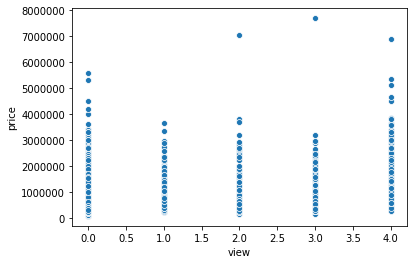

In [6]:
sns.scatterplot(x=df['view'], y=df['price'])

Weak correlation between number of views and the price of the house.

# 'Bathrooms' Variable Analysis

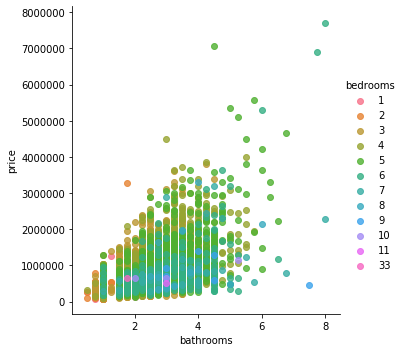

In [8]:
sns.lmplot('bathrooms', 'price', data=df, fit_reg=False, hue = 'bedrooms')

Significant correlation with number of bathrooms and price. A fair few outliers to take a look at and possibly exclude.

# 'sqft_living' Variable Analysis

In [21]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

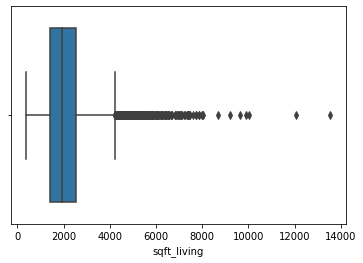

In [22]:
sns.boxplot(x = df['sqft_living'])

Doesn't look like there are any absurd outliers in this variable's data set.

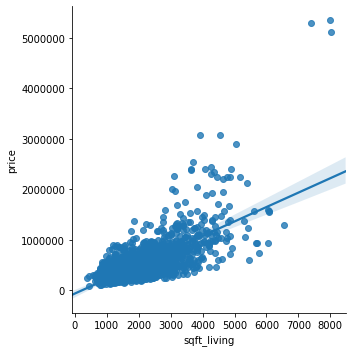

In [9]:
sns.lmplot('sqft_living', 'price', data=df[:2000], fit_reg=True)

# Seattle Zipcodes

In [10]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

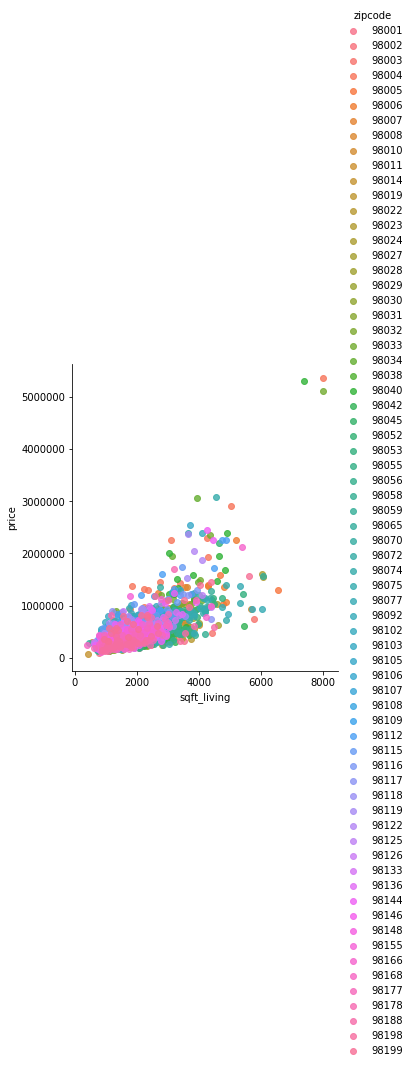

In [11]:
sns.lmplot('sqft_living', 'price', data=df[:2000], fit_reg=False, hue = 'zipcode')

# 'grade' Variable Analysis

In [12]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

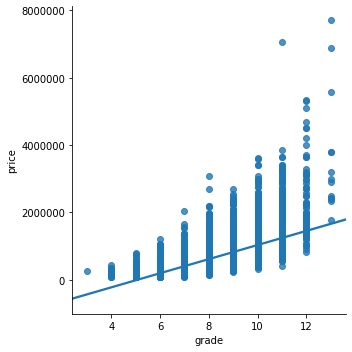

In [13]:
sns.lmplot('grade', 'price', data=df, fit_reg=True)


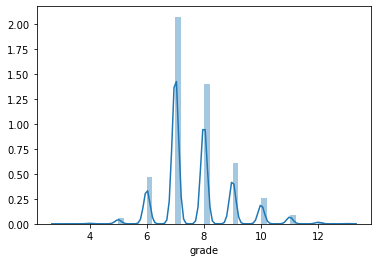

In [14]:
sns.distplot(df['grade'])

# 'bedroom' Variable Analysis

In [15]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

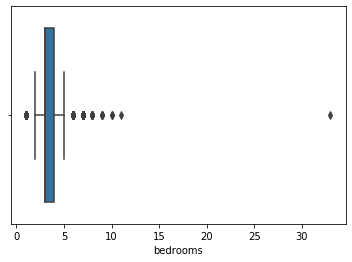

In [16]:
sns.boxplot(x = df['bedrooms'])

Clear outlier with 33 bedrooms. This was probably meant to be 3 bedrooms but the button was pressed twice. Further investigation is required to confirm this. First we will look at the squarefootage of the house to determine how many bedrooms it likey has.

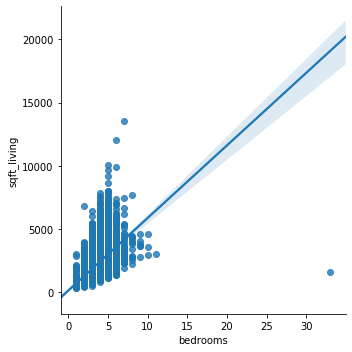

In [17]:
sns.lmplot('bedrooms', 'sqft_living', data=df, fit_reg=True)

In [18]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1947,1947.0,98103,47.6878,-122.331,1330,4700,6,25,2014


It would be reasonable to assume that with only 1620 sqft of living space the property doesnt have 33 bedrooms, but rather 3 bedrooms. We will replace the 33 with 3 in the following lines of codes.

In [19]:
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [20]:
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y


# 'sqft_above' Variable Analysis

In [26]:
df['sqft_above'].describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

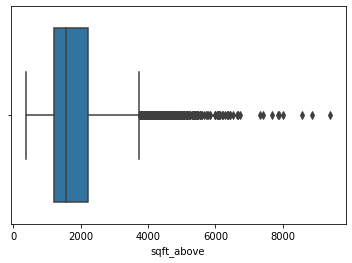

In [27]:
sns.boxplot(x = df['sqft_above'])

# 'sqft_lot' Variable Analysis

In [35]:
df['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

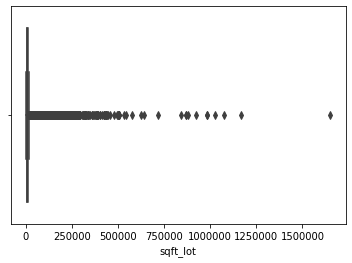

In [37]:
sns.boxplot(x = df['sqft_lot'])

In [38]:
df.loc[df['sqft_lot'] == 1651359]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
1717,1020069017,3/27/2015,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,1920,1920.0,98022,47.2313,-122.023,2560,425581,3,27,2015


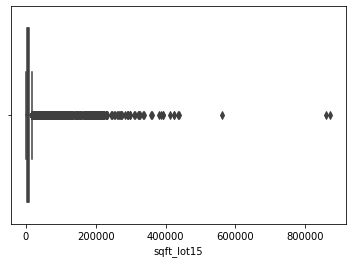

In [39]:
sns.boxplot(x = df['sqft_lot15'])

This isn't unreasonable despite the properties having low sqft_living values becuase the properties could be situated on a large.

# Beginning of Regression Analysis

In [69]:
def lin_regression(variable):
    regression = sm.OLS(df['price'], df[variable])
    results = regression.fit()
    return results.summary()

In [70]:
lin_regression('bedrooms')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          5.381e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:48:05   Log-Likelihood:                     -3.0632e+05
No. Observations:               21597   AIC:                                  6.126e+05
Df Residuals:                   21596   BIC:                                  6.127e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    1.581e+05    681.566    231.970      0.000    1.57e+05    1.59e+05
==============================================================================
Omnibus:                    18235.335   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1043119.245
Skew:                           3.736   Prob(JB):                         0.00
Kurtosis:                      36.217   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
lin_regression('bathrooms')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                          7.282e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:48:57   Log-Likelihood:                     -3.0390e+05
No. Observations:               21597   AIC:                                  6.078e+05
Df Residuals:                   21596   BIC:                                  6.078e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   2.549e+05    944.498    269.857      0.000    2.53e+05    2.57e+05
==============================================================================
Omnibus:                    17124.797   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           862045.451
Skew:                           3.417   Prob(JB):                         0.00
Kurtosis:                      33.187   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
lin_regression('sqft_living')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.124e+05
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:49:10   Log-Likelihood:                     -3.0011e+05
No. Observations:               21597   AIC:                                  6.002e+05
Df Residuals:                   21596   BIC:                                  6.002e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.1647      0.785    335.319      0.000     261.626     264.703
==============================================================================
Omnibus:                    16021.993   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689028.909
Skew:                           3.128   Prob(JB):                         0.00
Kurtosis:                      29.955   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lin_regression('grade')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                          7.006e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:49:34   Log-Likelihood:                     -3.0422e+05
No. Observations:               21597   AIC:                                  6.084e+05
Df Residuals:                   21596   BIC:                                  6.084e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       7.373e+04    278.558    264.693      0.000    7.32e+04    7.43e+04
==============================================================================
Omnibus:                    21420.678   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2051737.740
Skew:                           4.683   Prob(JB):                         0.00
Kurtosis:                      49.822   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lin_regression('sqft_above')

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          8.544e+04
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:51:42   Log-Likelihood:                     -3.0254e+05
No. Observations:               21597   AIC:                                  6.051e+05
Df Residuals:                   21596   BIC:                                  6.051e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqft_above   296.1851      1.013    292.303      0.000     294.199     298.171
==============================================================================
Omnibus:                    15075.896   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548598.760
Skew:                           2.903   Prob(JB):                         0.00
Kurtosis:                      26.998   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above analysis we can see that with all else held constant, every additional bedroom results in a price increase of $158,000.

In [86]:
X = df[['sqft_living','bedrooms','bathrooms']]
y = df['price']
X = sm.add_constant(X)
first_multi = sm.OLS(y,X)
results = first_multi.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7443.
Date:                Fri, 17 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:00:34   Log-Likelihood:            -2.9972e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         8.67e+04   7064.400     12.273      0.000    7.29e+04    1.01e+05
sqft_living   312.5785      3.111    100.460      0.000     306.480     318.677
bedrooms    -6.387e+04   2436.201    -26.219      0.000   -6.86e+04   -5.91e+04
bathrooms    8839.4165   3521.277      2.510      0.012    1937.453    1.57e+04
==============================================================================
Omnibus:                    14302.264   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           480435.886
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      25.463   Cond. No.                     9.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Investigation into how

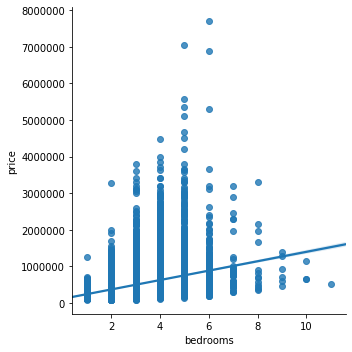

In [64]:
sns.lmplot('bedrooms', 'price', data=df, fit_reg=True)

In [91]:
zipcode_1 = df.loc[df['zipcode'] == 98001]
zipcode_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
38,7895500070,2/13/2015,240000.0,4,1.00,1220,8075,1.0,0.0,0.0,...,1969,1969.0,98001,47.3341,-122.282,1290,7800,2,13,2015
67,3717000160,10/9/2014,287000.0,4,2.50,2240,4648,2.0,0.0,0.0,...,2005,2005.0,98001,47.3378,-122.257,2221,4557,10,9,2014
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,0.0,0.0,...,2001,2001.0,98001,47.3183,-122.253,2640,8517,10,28,2014
213,4014400292,1/14/2015,465000.0,3,2.50,2714,17936,2.0,0.0,0.0,...,2005,2005.0,98001,47.3185,-122.275,2590,18386,1,14,2015
292,1115450240,10/22/2014,360000.0,4,2.50,2160,9528,2.0,0.0,0.0,...,1992,1992.0,98001,47.3341,-122.255,2280,9937,10,22,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21375,3094000210,1/5/2015,269950.0,3,2.50,2244,4079,2.0,0.0,0.0,...,2012,2012.0,98001,47.2606,-122.254,2077,4078,1,5,2015
21463,6181500120,6/23/2014,312891.0,5,3.00,2300,8214,2.0,0.0,0.0,...,2013,2013.0,98001,47.3052,-122.276,2594,4950,6,23,2014
21495,3304030220,4/21/2015,480000.0,4,2.50,2940,9172,2.0,0.0,0.0,...,2006,2006.0,98001,47.3444,-122.269,2660,7955,4,21,2015
21549,5007500120,2/26/2015,341780.0,4,2.75,2260,4440,2.0,0.0,0.0,...,2014,2014.0,98001,47.3507,-122.291,2260,4563,2,26,2015


In [95]:
X = zipcode_1[['sqft_living','bathrooms']]
y = zipcode_1['price']
X = sm.add_constant(X)
first_multi = sm.OLS(y,X)
results = first_multi.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     353.3
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           1.89e-85
Time:                        14:14:37   Log-Likelihood:                -4467.0
No. Observations:                 361   AIC:                             8940.
Df Residuals:                     358   BIC:                             8952.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.578e+04   1.09e+04      4.192      0.000    2.43e+04    6.73e+04
sqft_living   122.5254      6.010     20.387      0.000     110.706     134.345
bathrooms    1068.6288   6449.132      0.166      0.868   -1.16e+04    1.38e+04
==============================================================================
Omnibus:                       54.109   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.919
Skew:                           0.838   Prob(JB):                     1.22e-22
Kurtosis:                       4.975   Cond. No.                     7.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
regression = sm.OLS(zipcode_1['price'], zipcode_1['sqft_living'])
results = regression.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              8760.
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                   9.32e-255
Time:                        14:11:26   Log-Likelihood:                         -4479.2
No. Observations:                 361   AIC:                                      8960.
Df Residuals:                     360   BIC:                                      8964.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   145.1204      1.551     93.594      0.000     142.071     148.170
==============================================================================
Omnibus:                       27.253   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.965
Skew:                           0.427   Prob(JB):                     1.91e-12
Kurtosis:                       4.690   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,M,D,Y
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,10,13,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,9,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,2,25,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,12,9,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,2,18,2015
